# 1. Naive Bayes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [10]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

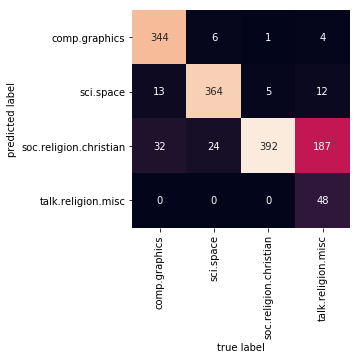

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 2. Wine Dataset

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('C:/Users/samsung/Downloads/Wine.csv',header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [42]:
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [43]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

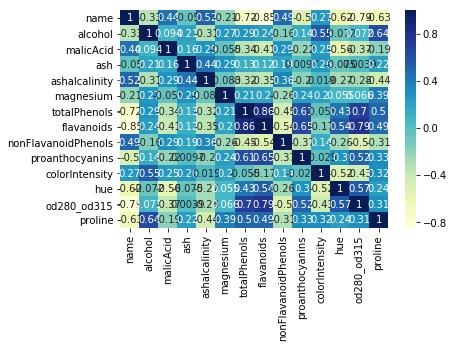

In [44]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

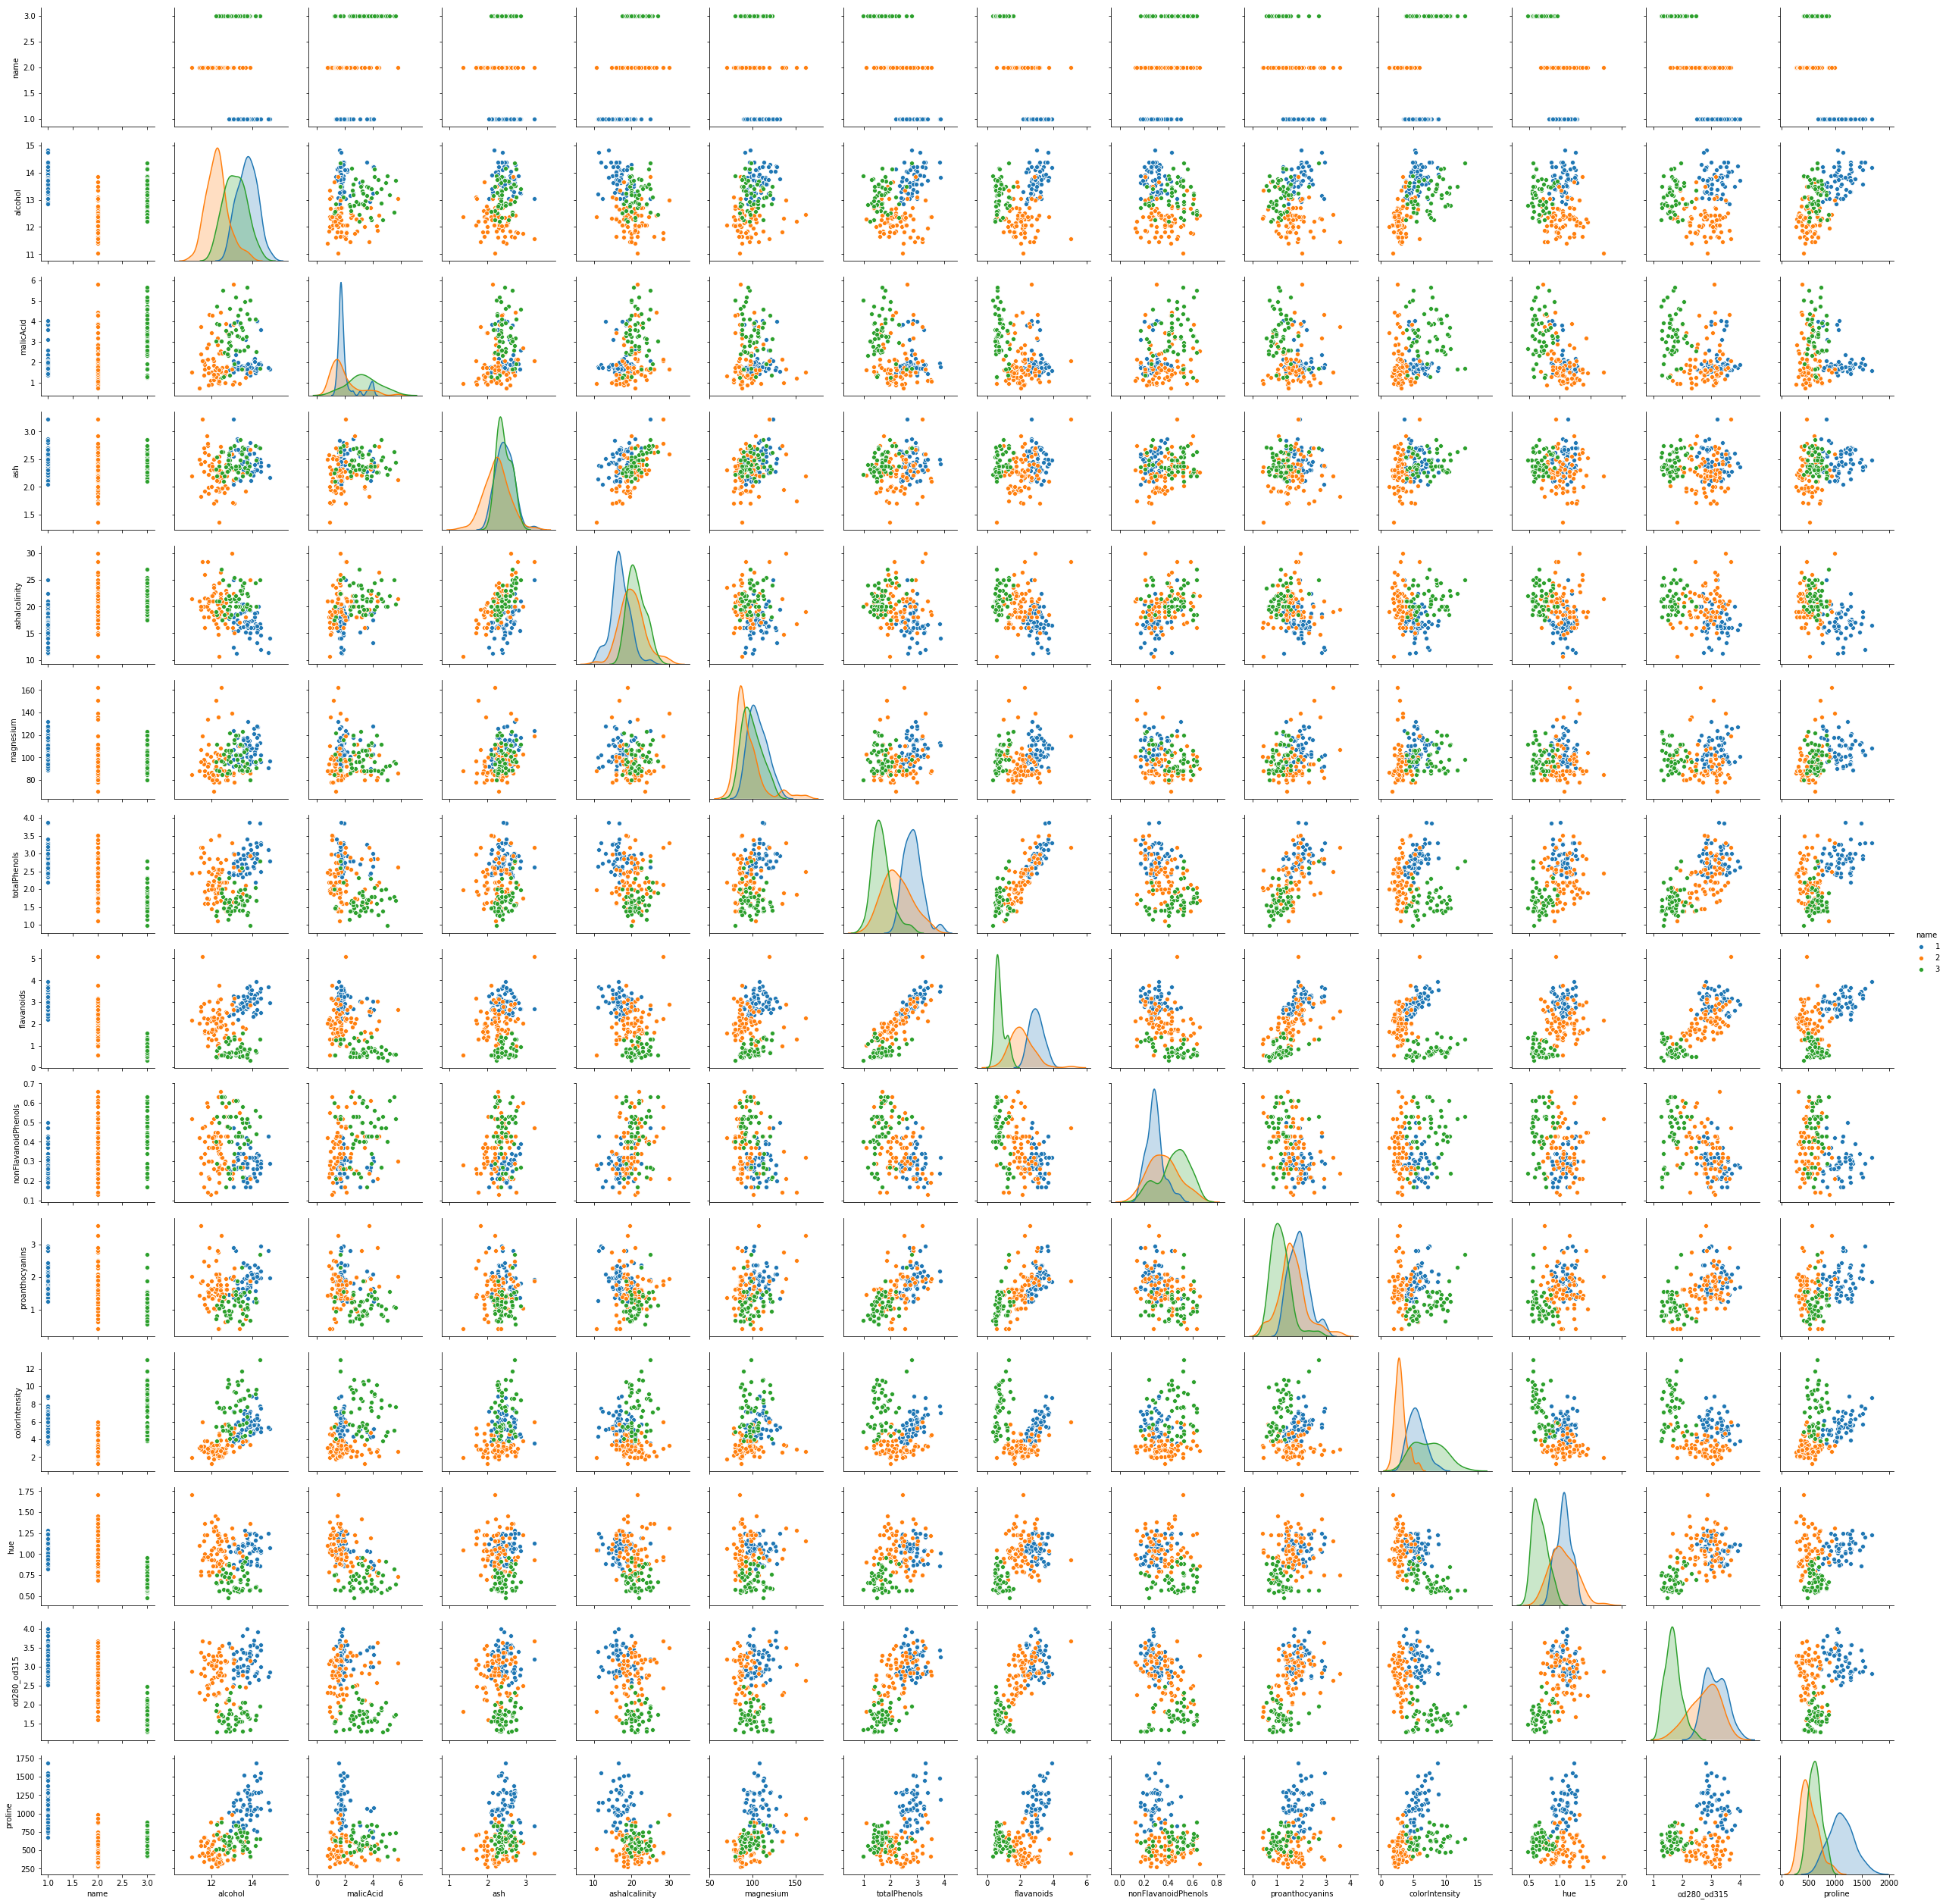

In [45]:
sns.pairplot(df,hue="name")
plt.show()

In [48]:
X= df.drop(['name','ash'], axis=1)
Y=df.iloc[:,:1]
X.head(5)

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=list(X.columns))

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, Y)
X_lda = lda.transform(X_scaled)

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


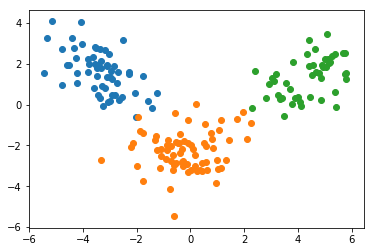

In [86]:
XDF_lda = pd.DataFrame(X_lda,columns=["PC1","PC2"])
XDF_lda['target'] = Y
markers = [1,2,3]
for i in markers:
    X_axis_data = XDF_lda[XDF_lda['target']==i]['PC1']
    Y_axis_data = XDF_lda[XDF_lda['target']==i]['PC2']
    plt.scatter(X_axis_data,Y_axis_data)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
models = []
models.append(("LDA:",LinearDiscriminantAnalysis()))
models.append(("QDA:",QuadraticDiscriminantAnalysis()))
models.append(("Logistic:",LogisticRegression()))

In [103]:
import warnings
warnings.filterwarnings('ignore')
results = []
names = []
accuracy_pred = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
    accuracy_pred.append(accuracy_pred)

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # No column of 1s
XP = poly.fit_transform(X)
XP_train, XP_test, Y_train, Y_test = train_test_split(XP, Y, test_size=0.3, random_state=0)
model = LogisticRegression()

kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,XP_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
names.append("PolyLogisticRegression:")
results.append(cv_result)
accuracy_pred.append(accuracy_pred)


In [106]:
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

LDA: 95.25641025641025
QDA: 97.56410256410257
Logistic: 95.1923076923077
PolyLogisticRegression: 93.65384615384616


In [108]:
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
logistic = LogisticRegression()
poly_logistic = LogisticRegression()
# LDA
lda.fit(X_train,Y_train)
lda_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(Y_test,lda_pred)
#QDA
qda.fit(X_train,Y_train)
qda_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(Y_test,qda_pred)
# Logistic
logistic.fit(X_train,Y_train)
logistic_pred = logistic.predict(X_test)
logistic_accuracy = accuracy_score(Y_test,logistic_pred)
# Poly Logistic
poly_logistic.fit(XP_train,Y_train)
poly_logistic_pred = poly_logistic.predict(XP_test)
poly_logistic_accuracy = accuracy_score(Y_test,poly_logistic_pred)

In [118]:
print("LDA : {0:.3f}".format(lda_accuracy))
print("QDA : {0:.3f}".format(qda_accuracy))
print("Logistic : {0:.3f}".format(logistic_accuracy))
print("Poly_Logistic : {0:.3f}".format(poly_logistic_accuracy))

LDA : 0.963
QDA : 1.000
Logistic : 0.944
Poly_Logistic : 0.907
